# Titanic - Machine Learning from Disaster 

## 1.	Load and Preprocess the Data

In [46]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


###	Loading the Titanic dataset.

In [47]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


Below are the descriptions of the dataframe:

- PassengerID - A column added by Kaggle to identify each row and make submissions easier
- Survived - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex - The passenger's sex
- Age - The passenger's age in years
- SibSp - The number of siblings or spouses the passenger had aboard the Titanic
- Parch - The number of parents or children the passenger had aboard the Titanic
- Ticket - The passenger's ticket number
- Fare - The fare the passenger paid
- Cabin - The passenger's cabin number
- Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

### Preprocessing

#### Understanding the datasets

In [48]:
# Shape of the dataset

print('Shape of the dataset:', df.shape)

Shape of the dataset: (891, 12)


In [49]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
# Checking for missing values

df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

As we can see out of 891 records, 687 numbers of records are missing with Cabin information. So more than 75% data are missing. So we will discard this column.

Also we will discard Passenger ID, Name and Ticket column considering these are not significant in this dataset.

### Extract key features

In [51]:
# Removing the unnecessary columns

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


### Evaluate key features (EDA)

Survived
0    549
1    342
Name: count, dtype: int64


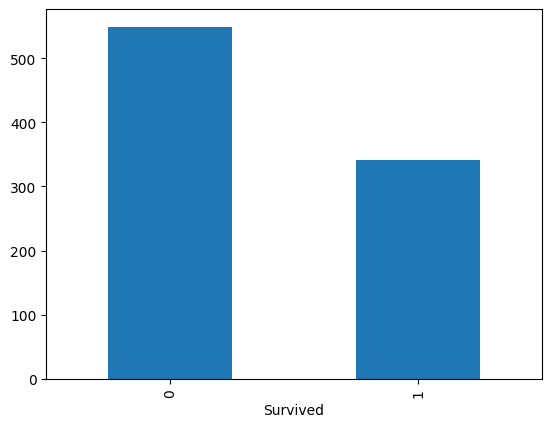

In [52]:
# Survival and dead count

print(df.value_counts('Survived'))

df.value_counts('Survived').plot(kind='bar')
plt.show()

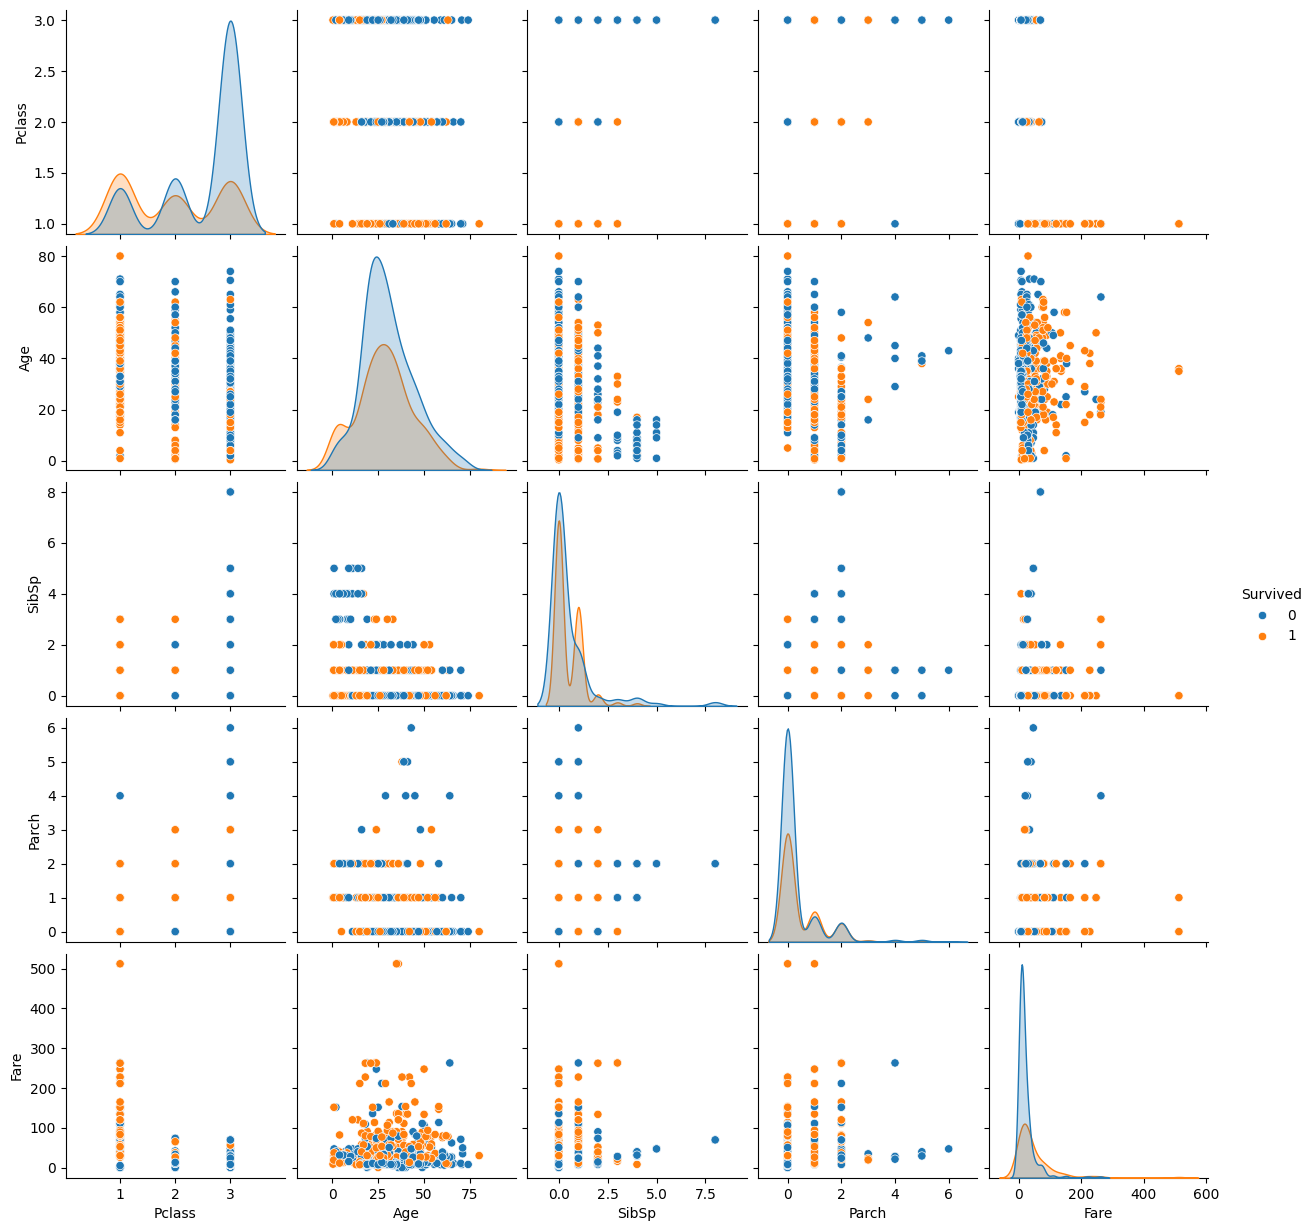

In [53]:
sns.pairplot(df, hue='Survived')
plt.show()

From the above pairplot we can see the diagonal cells to see the distribution survival or dead of each column.

<Axes: xlabel='Survived'>

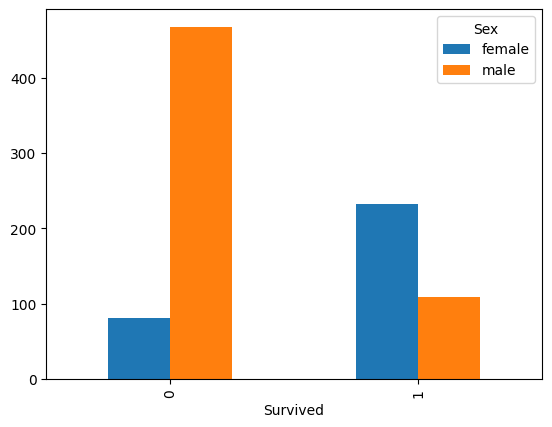

In [54]:
# Survival count based on gender

df.value_counts(['Survived','Sex']).unstack().plot(kind='bar', stacked=False)

Survival chance of female is signifiantly higher than male.

<Axes: xlabel='Survived'>

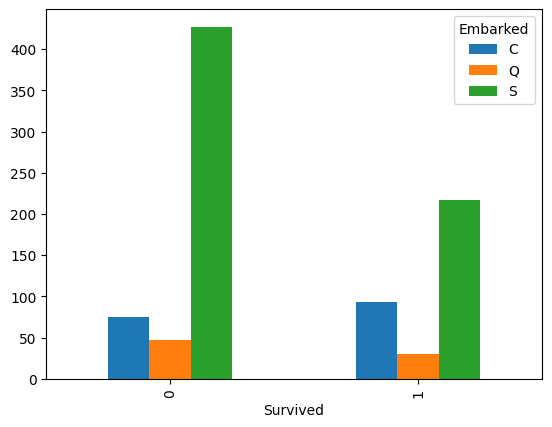

In [55]:
# Survival count based on Embarked

df.value_counts(['Survived','Embarked']).unstack().plot(kind='bar', stacked=False)

From the chart above we can see there's a significant difference between survival or death if the embarked point is Southampton.

### Handling missing values

<Axes: xlabel='Survived'>

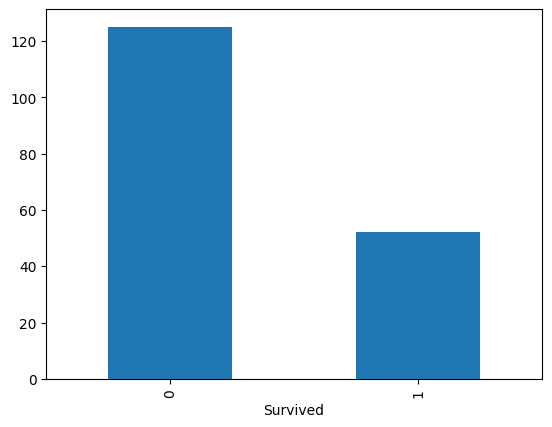

In [56]:
# Checking the survival count based on age missing values

df[df.Age.isna()].value_counts('Survived').plot(kind='bar')

In [57]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [58]:
# Replacing missing values in the 'Age' column with the mean of the column

df['Age']= df['Age'].fillna(df['Age'].mean())

In [59]:
#Checking the missing values in the 'Embarked' column

df[df.Embarked.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
61,1,female,38.0,0,0,80.0,NaN,1
829,1,female,62.0,0,0,80.0,NaN,1


In [60]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [61]:
# Replacing missing values in the 'Embarked' column with the mode of the column

df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])


In [62]:
# Checking there are no missing values in the dataset

df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [63]:
#df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [64]:
# Statistical summary of the dataset

df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,13.002015,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


### Encoding categorical variables

In [65]:
# Dividing the dataset into features and target

X = df.drop('Survived', axis=1)
y = df['Survived']

In [66]:
# Dispalying the features

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [67]:
# Encoding the categorical columns (Pclass, Sex, Embarked)
# And dropping the first column to avoid dummy variable trap or multicollinearity issue

X = pd.get_dummies(X, columns=['Pclass','Sex','Embarked'],prefix=['Pclass','Sex','Embarked'], drop_first=True, dtype=int)

X.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


We have 2 continuous numerical variables. Age and Fare. For this exercise we use GaussianNB and SVM. Both the models works good with continuous numerical variables. So we do not need to convert those column if they follow a normal distribution as normal distribution is the assumption of GaussianNB.

So we will check the distribution of those Age and Fare columns.

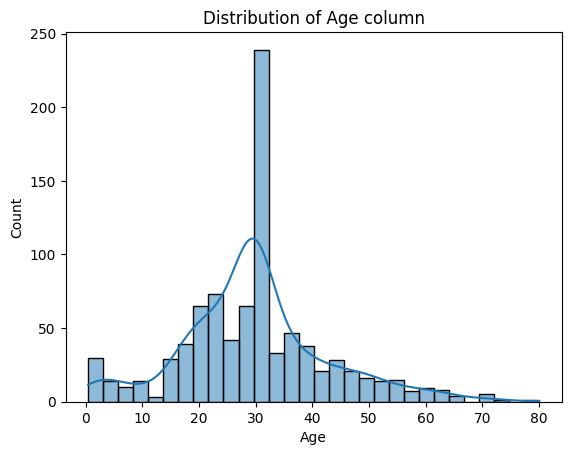

In [68]:
# Distribution of Age column

sns.histplot(X['Age'], kde=True)
plt.title('Distribution of Age column')
plt.show()

From the above graph this can be seen the age column is approximately normally distributed.

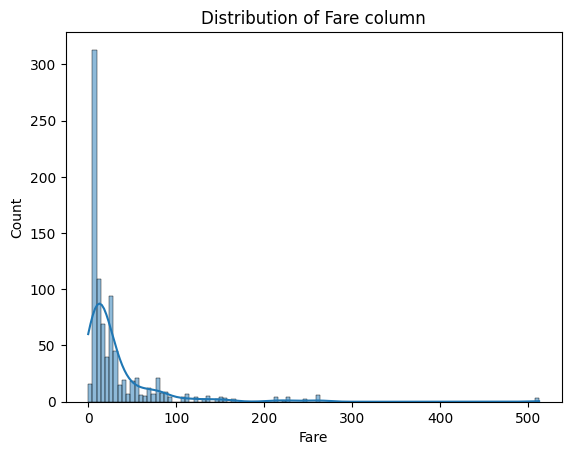

In [69]:
# Distribution of Fare column

sns.histplot(X['Fare'], kde=True)
plt.title('Distribution of Fare column')
plt.show()

From the above graph we can see Fare column is right skewed. So we will do log transformation to transform the column into normally distributed column.

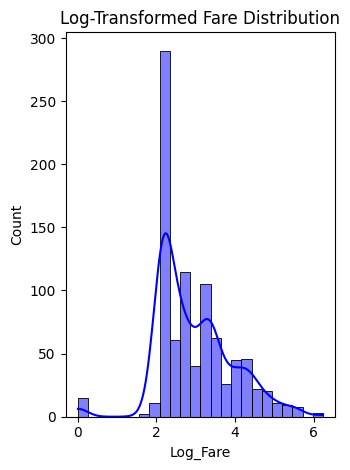

In [70]:
# Log transformation of Fare column

X['Log_Fare'] = np.log1p(X['Fare'])  # log1p handles zeros safely by computing log(1 + x)

# Visualize the transformed data
plt.subplot(1, 2, 2)
sns.histplot(X['Log_Fare'], kde=True, color='blue')
plt.title('Log-Transformed Fare Distribution')
plt.tight_layout()
plt.show()

In [71]:
# Dropping the 'Fare' column

X.drop('Fare', axis=1, inplace=True)

X.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Log_Fare
0,22.0,1,0,0,1,1,0,1,2.110213
1,38.0,1,0,0,0,0,0,0,4.280593
2,26.0,0,0,0,1,0,0,1,2.188856
3,35.0,1,0,0,0,0,0,1,3.990834
4,35.0,0,0,0,1,1,0,1,2.202765


In [72]:
# Splitting the dataset into training (70%) and testing (30%) sets with random state as 42

# Importing the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Train a Naïve Bayes Classifier 

In [73]:
# Importing the Gaussian Naive Bayes model from sklearn

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

### o	Train a Naïve Bayes classifier 

In [74]:
# Training the model

model.fit(X_train, y_train)

GaussianNB()

In [75]:
# Importing necessary libraries for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

Accuracy of the model - Naive Bayes: 0.7723880597014925


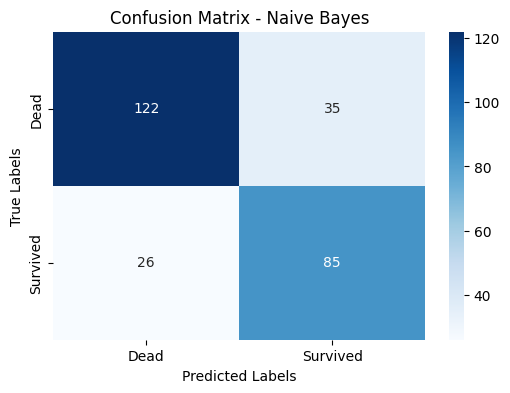

Classification report - Naive Bayes:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       157
           1       0.71      0.77      0.74       111

    accuracy                           0.77       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.77      0.77       268

ROC AUC Score - Naive Bayes: 0.8532162735984391


In [76]:
# Making predictions
y_pred = model.predict(X_test)

# Calculating the accuracy of the model
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of the model - Naive Bayes:', accuracy_NB)

# Creating a confusion matrix for the Naive Bayes model
conf_matrix_NB = confusion_matrix(y_test, y_pred)

labels = ['Dead', 'Survived']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_NB, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Creating a classification report
class_report_NB = classification_report(y_test, y_pred)
print('Classification report - Naive Bayes:\n', class_report_NB)

# Calculating the probabilities
y_pred_prob = model.predict_proba(X_test)[:,1]

# Calculating the roc_auc_score
roc_auc_NB = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC Score - Naive Bayes:', roc_auc_NB)

### o	Evaluate performance using 5-fold cross-validation.

In [77]:
# Cross Validation
from sklearn.model_selection import cross_val_score

# Applying 5-Fold Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Cross-validation scores:', cv_scores)

# Calculating the average accuracy
avg_cv_score = np.mean(cv_scores)
print('Average Cross-validation Score:', avg_cv_score)




Cross-validation scores: [0.68156425 0.70224719 0.78089888 0.78651685 0.79775281]
Average Cross-validation Score: 0.7497959952294269


From the score above we can see after 5-fold cross validation the accuracy has been decreased to 74.98% from 77.24%. We get higher score beofre cross validation. This is probably happening due to selecting a fixed random state of 42.

## 3. Train an SVM Model 

### o Selecting a relevant feature set

We will used the same feature set X and y that we used for GuassianNB mode except for simplicity we will drop SibSp and Parch column.

In [78]:
# Dropping the SibSp and Parch column
X.drop(['SibSp', 'Parch'], axis=1, inplace=True)

X.head()

,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Log_Fare
0,22.0,0,1,1,0,1,2.110213
1,38.0,0,0,0,0,0,4.280593
2,26.0,0,1,0,0,1,2.188856
3,35.0,0,0,0,0,1,3.990834
4,35.0,0,1,1,0,1,2.202765


### Trainig a SVM model

In [79]:
# Importing the necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [80]:
# Splitting the dataset into training (70%) and testing (30%) sets with random state as 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
# Standardizing the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)       # Only transform testing data


In [82]:
# Initialize the SVM classifier with a kernel of your choice
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # C is the regularization parameter

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [83]:
# Predict the target values

y_pred = svm_model.predict(X_test)

Accuracy of the model - SVM (non-optimized): 0.7910447761194029


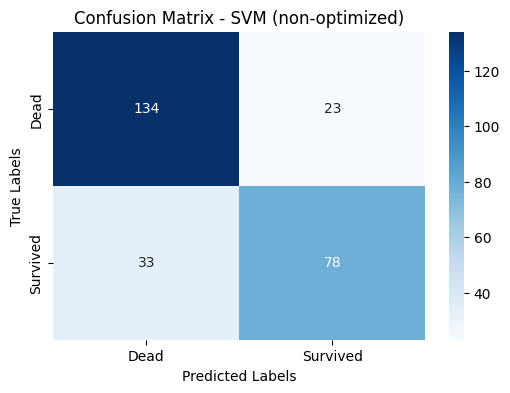

Classification report - SVM (non-optimized):
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [84]:
# Calculating the accuracy of the model
accuracy_SVM_nonoptimized = accuracy_score(y_test, y_pred)
print('Accuracy of the model - SVM (non-optimized):', accuracy_SVM_nonoptimized)

# Creating a confusion matrix for the SVM model (non-optimized)
cm_SVM_nonoptimized = confusion_matrix(y_test, y_pred)

labels = ['Dead', 'Survived']

# Plot confusion matrix for SVM model (non-optimized)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_SVM_nonoptimized, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - SVM (non-optimized)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Creating a classification report for the SVM model (non-optimized)
class_report_SVM_nonoptimized = classification_report(y_test, y_pred)
print('Classification report - SVM (non-optimized):\n', class_report_SVM_nonoptimized)

So, from the above result we can the accurecy of the model is 79.10%.

### o Optimize hyperparameters using grid search and applying 5-fold cross validation

In [85]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], # C is the regularization parameter
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01 ]
}

# Initialize GridSearch
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, scoring='accuracy')

# Fit GridSearch to training data
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.8218193548387097


And we see that the ideal value for `C` is 1 which means we will used high regulariztion, and the value of `gamma` is 0.1, and the ideal `kernel` is 'rbf'.

### o	Evaluate performance using 5-fold cross-validation.

We used 5-flod cross validation in our previous step. We will use the best parameters from that GridSearch to evaluate performance.

Accuracy of the model: 0.8059701492537313


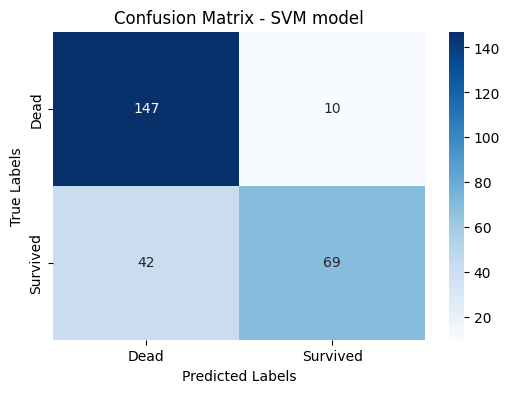

Classification report - SVM model:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85       157
           1       0.87      0.62      0.73       111

    accuracy                           0.81       268
   macro avg       0.83      0.78      0.79       268
weighted avg       0.82      0.81      0.80       268



In [86]:
# Initialize the SVM classifier with best parameters from GridSearch
svm_model_optimized = SVC(kernel='rbf', C=1.0, gamma=0.1, random_state=42)  

# Train the model
svm_model_optimized.fit(X_train, y_train)

# Predict the target values
y_pred = svm_model_optimized.predict(X_test)

# Calculating the accuracy of the SVM model
accuracy_SVM = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', accuracy_SVM)

# Creating a confusion matrix for the SVM model
conf_matrix_SVM = confusion_matrix(y_test, y_pred)

labels = ['Dead', 'Survived']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - SVM model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Creating a classification report for the SVM model
class_report_SVM = classification_report(y_test, y_pred)
print('Classification report - SVM model:\n', class_report_SVM)


So, we can see the performance of our model improves slightly after using best parameters derived from GridSearchCV. Accuracy score improved to 80.60% from 79.10%.

# Assigning weight to minority class to imporve recall of class 1

Accuracy of the model: 0.7798507462686567


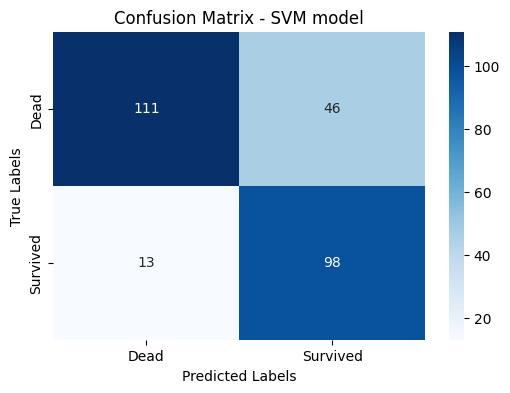

Classification report - SVM model:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       157
           1       0.68      0.88      0.77       111

    accuracy                           0.78       268
   macro avg       0.79      0.79      0.78       268
weighted avg       0.81      0.78      0.78       268



In [90]:
# Define class weights
class_weights = {0: 1, 1: 3}  # Higher weight for the minority class

# Initialize the SVM classifier with best parameters from GridSearch
svm_model_optimized = SVC(class_weight=class_weights, probability=True, kernel='rbf', C=1.0, gamma=0.1, random_state=42)  

# Train the model
svm_model_optimized.fit(X_train, y_train)

# Predict the target values
y_pred = svm_model_optimized.predict(X_test)

# Calculating the accuracy of the SVM model
accuracy_SVM = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', accuracy_SVM)

# Creating a confusion matrix for the SVM model
conf_matrix_SVM = confusion_matrix(y_test, y_pred)

labels = ['Dead', 'Survived']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - SVM model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Creating a classification report for the SVM model
class_report_SVM = classification_report(y_test, y_pred)
print('Classification report - SVM model:\n', class_report_SVM)

## 4. Comparing Model Performance 

### o Compare the test accuracies of Naïve Bayes and SVM models.

In [42]:
# Accuracy comparison
print('Accuracy of the Naive Bayes model:', accuracy_NB)
print('Accuracy of the SVM model (non-optimized):', accuracy_SVM_nonoptimized)
print('Accuracy of the Support Vector Machine model:', accuracy_SVM)

Accuracy of the Naive Bayes model: 0.7723880597014925
Accuracy of the SVM model (non-optimized): 0.7910447761194029
Accuracy of the Support Vector Machine model: 0.8059701492537313


- From the above result we can see our parameter optimized SVM model has greater accuracy with 80.60% than both non-optimized SVM model & Naive Bayes model.

- Non-optimized SVM model accuracy score was 79.10%

- Naive Bayes model accuracy score was 77.24%.

### o Describing the evaluation metrics used

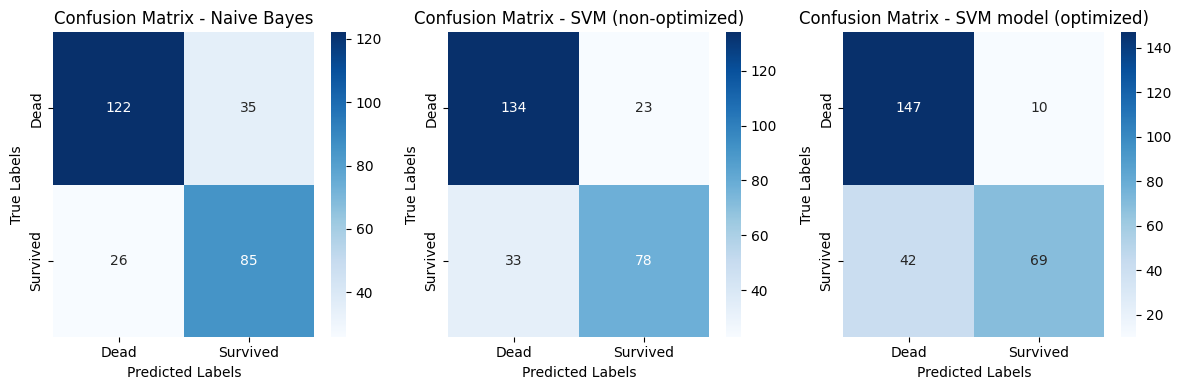

Classification report - Naive Bayes:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       157
           1       0.71      0.77      0.74       111

    accuracy                           0.77       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.77      0.77       268



Classification report - SVM (non-optimized):
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



Classification report - SVM model (optimized):
               precision    recall  f1-score   support

           0       0.78      0.94      0.85       157
           1       0.87      0.62      0.73       111

    accuracy                           0.81   

In [43]:
# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

# Plot the first confusion matrix - Naive Bayes
sns.heatmap(conf_matrix_NB, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix - Naive Bayes')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot the second confusion matrix - SVM model (non-optimized)
sns.heatmap(cm_SVM_nonoptimized, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Confusion Matrix - SVM (non-optimized)')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Plot the third confusion matrix - SVM model
sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title('Confusion Matrix - SVM model (optimized)')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Classification report - Naive Bayes
print('Classification report - Naive Bayes:\n', class_report_NB)

print('\n')

# Classification report for the SVM model (non-optimized)
print('Classification report - SVM (non-optimized):\n', class_report_SVM_nonoptimized)

print('\n')

# Classification report for the SVM model (optimized)
print('Classification report - SVM model (optimized):\n', class_report_SVM)

#### **Evaluation Metrics Used in the Model**

#### Accuracy
- **Definition**: The ratio of correctly predicted samples to the total number of samples.
- **Formula**: (TP + TN) / Total Samples
- **Interpretation**: Indicates how often the model predicts correctly, regardless of the class. However, it might be misleading for imbalanced datasets. In our case our dataset is slightly imbalanced. Where dead case are 549 and survived case are 342.

##### Examples:
- Naive Bayes: `0.77` (77%)
- SVM (non-optimized): `0.79` (79%)
- SVM (optimized): `0.81` (81%)


#### Precision
- **Definition**: The ratio of true positives to the total predicted positives.
- **Formula**: TP / (TP + FP)
- **Interpretation**: Precision measures how many of the predicted labels for a class are actually correct.

##### Class-Specific Examples:
- **Dead (Class 0)**:
  - Naive Bayes: `0.82`
  - SVM (optimized): `0.78`
- **Survived (Class 1)**:
  - Naive Bayes: `0.71`
  - SVM (optimized): `0.87`


#### Recall (Sensitivity, True Positive Rate)
- **Definition**: The ratio of true positives to the total actual positives.
- **Formula**: TP / (TP + FN)
- **Interpretation**:
  - **Dead (Class 0)**: Recall measures how many actual "Dead" cases were correctly identified.
    - Naive Bayes: `0.78`
    - SVM (optimized): `0.94`
  - **Survived (Class 1)**: Recall measures how many actual "Survived" cases were correctly identified.
    - Naive Bayes: `0.77`
    - SVM (optimized): `0.62`


#### F1-Score
- **Definition**: The harmonic mean of precision and recall.
- **Formula**: 2 * (Precision * Recall) / (Precision + Recall)
- **Interpretation**: Useful when there’s an uneven class distribution or when both false positives and false negatives matter.

##### Class-Specific Examples:
- **Dead (Class 0)**:
  - Naive Bayes: `0.80`
  - SVM (optimized): `0.85`
- **Survived (Class 1)**:
  - Naive Bayes: `0.74`
  - SVM (optimized): `0.73`

#### Insights Based on the Metrics
- **Dead (Class 0)**: The optimized SVM model performs better at predicting "Dead" cases, achieving a **recall of 0.94** and an **F1-score of 0.85**. This means it correctly identifies almost all "Dead" cases with high confidence.
- **Survived (Class 1)**: The recall for "Survived" cases is lower in the optimized SVM model (`0.62`), meaning it struggles to identify all people who survived but achieves a high precision (`0.87`), indicating fewer false positives.



### Findings and insights from the results

1. **Overall Performance**  
   - The highest overall accuracy is held by the tuned SVM model at **81%**, which is better than the untuned SVM model (**79%**) and the Naive Bayes model (**77%**).  
   - This shows that hyperparameter tuning greatly enhances model performance.

2. **Class-Specific Analysis**  
   - **Dead (Class 0):**  
     - The best parameter SVM model is extremely accurate in predicting the "Dead" class, with **94% recall** and **85% F1-score**.  
     - That is, it can capture almost all the actual "Dead" cases appropriately.  
   - **Survived (Class 1):**  
     - The Naive Bayes model performs a bit better recall (**77%**) for the "Survived" class compared to the optimized SVM model (**62%**), i.e., it correctly captures more actual "Survived" instances.  
     - The optimized SVM model makes up for it with a significantly higher precision (**87%**), i.e., fewer false positives.

3. **Trade-Off Between Precision and Recall**  
   - There is a trade-off in predicting "Survived" cases:  
     - **Naive Bayes** is concerned with maximizing recall and is thus more suited to detecting survivors even at the expense of increased false positives.  
     - **Optimized SVM** prioritizes accuracy, reducing false positives but potentially missing some actual survivors.

4. **Model Insights**  
   - **Naive Bayes model** is comparatively well-balanced for both classes but a bit less accurate overall.  
   - The **unoptimized SVM model** returns decent performance gains but is not exceptional at any one measure.  
   - The **hyperparameter-tuned SVM model** drastically improves the classification of "Dead" instances and overall accuracy, illustrating the importance of hyperparameter tuning.

5. **Dataset Balance and Model Implications**  
   - The metrics reflect a moderate class imbalance, with the tuned SVM model favoring the majority class ("Dead") at the expense of minority class recall ("Survived").  
   - In applications where survivor identification is important, additional strategies like re-sampling or class weighting could be explored.

6. **Conclusion**  
   - The tuned SVM model is the most suitable to achieve the highest accuracy and precision in this instance, particularly for predicting the "Dead" cases.  
   - For applications where identification of survivors is more important, the Naive Bayes model or additional extension of the SVM model (e.g., via cost-sensitive learning) might be required.  
